In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Display top 11 rows

df = pd.read_csv('/Users/manassaxena/Documents/DTScience/Datasets/diabetes_prediction_dataset.csv')
df.head(11)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [3]:
# Checking size of the dataset

df.shape

(100000, 9)

In [4]:
# Checking and viewing null values and column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# If there are any duplpicates

df.duplicated().sum()

3854

In [6]:
# Unique values in each column

for x in df.columns:
    print(f"{x}",df[x].unique())

gender ['Female' 'Male' 'Other']
age [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes [

In [7]:
# Distinct values in each column

for x in df.columns:
    print(f"{x}",len(df[x].unique()))

gender 3
age 102
hypertension 2
heart_disease 2
smoking_history 6
bmi 4247
HbA1c_level 18
blood_glucose_level 18
diabetes 2


In [8]:
# Value counts in the column

gender_counts = df['gender'].value_counts()
gender_counts = pd.DataFrame(gender_counts)
gender_counts

,count
gender,
Female,58552
Male,41430
Other,18


In [9]:
# Value counts in the column

HbA1c_counts = df['HbA1c_level'].value_counts()
HbA1c_counts = pd.DataFrame(HbA1c_counts)
HbA1c_counts

,count
HbA1c_level,
6.6,8540
5.7,8413
6.5,8362
5.8,8321
6.0,8295
6.2,8269
6.1,8048
3.5,7662
4.8,7597


In [10]:
# Value counts in the column

Hdisease_counts = df['heart_disease'].value_counts()
Hdisease_counts = pd.DataFrame(Hdisease_counts)
Hdisease_counts

,count
heart_disease,
0,96058
1,3942


In [11]:
# Value counts in the column

SHistory = df['smoking_history'].value_counts()
SHistory = pd.DataFrame(SHistory)
SHistory

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [12]:
# Value counts in the column

Diabet_count = df['diabetes'].value_counts()
Diabet_count = pd.DataFrame(Diabet_count)
Diabet_count

,count
diabetes,
0,91500
1,8500


In [13]:
# Null values particularly for each column

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
# Removing all the rows having gender as others

df = df[df['gender'] != 'Other']
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [15]:
# Description of the datasets w.r.t stats

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# Univariate Analysis

<Axes: xlabel='gender'>

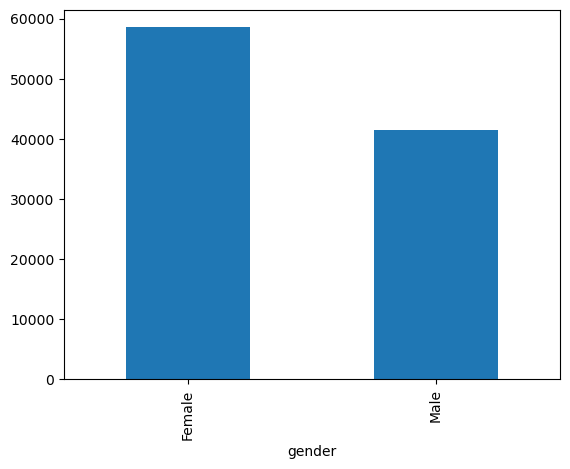

In [16]:
# Number of males and females

df['gender'].value_counts().plot(kind = 'bar')

<Axes: xlabel='smoking_history', ylabel='count'>

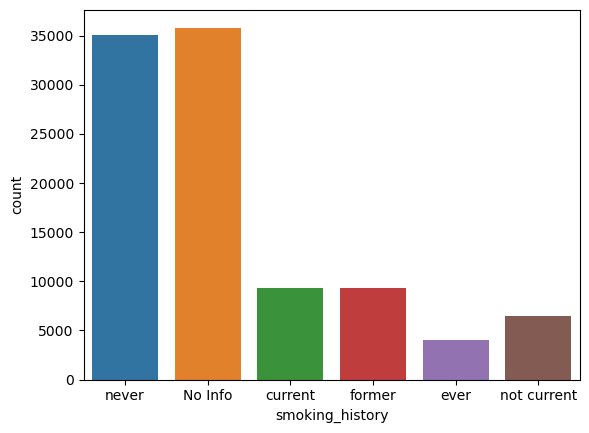

In [17]:
# Smoking stats

sns.countplot(data = df, x = 'smoking_history')

<Axes: xlabel='hypertension', ylabel='count'>

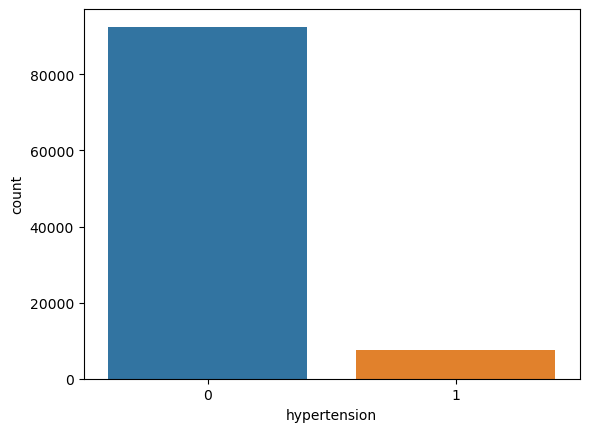

In [18]:
# 1 = having hypertension and 0 = no hypertension 

sns.countplot(data = df, x = 'hypertension')

<Axes: ylabel='count'>

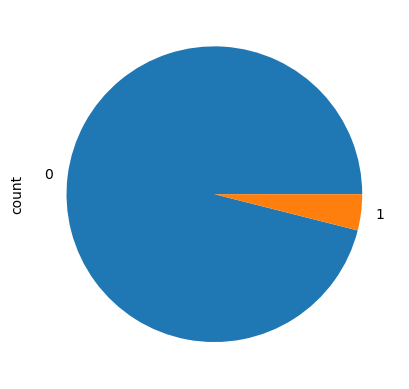

In [19]:
# 1 = having heart disease and 0 = no heart disease 

df['heart_disease'].value_counts().plot(kind = 'pie')

(array([8.6550e+03, 3.1391e+04, 5.0363e+04, 7.3860e+03, 1.7160e+03,
        3.7900e+02, 7.3000e+01, 8.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([10.01 , 18.578, 27.146, 35.714, 44.282, 52.85 , 61.418, 69.986,
        78.554, 87.122, 95.69 ]),
 <BarContainer object of 10 artists>)

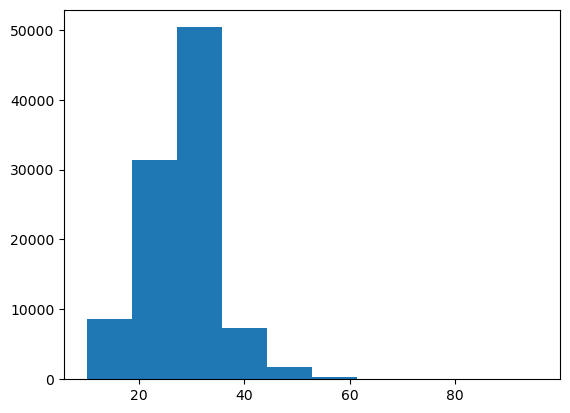

In [20]:
# Plotting BMI

plt.hist(df['bmi'])

<Axes: xlabel='gender', ylabel='count'>

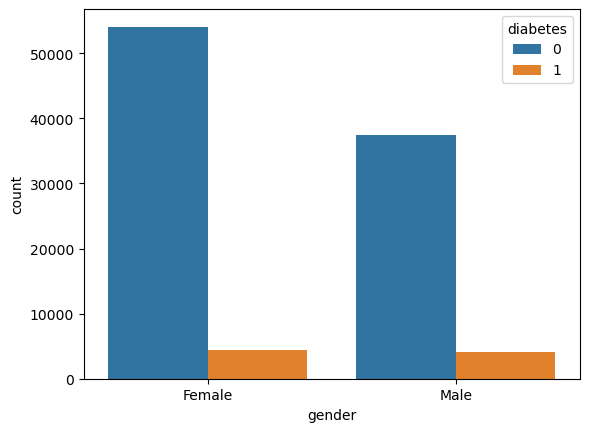

In [21]:
# Number of males anf females having diabetes

sns.countplot(data = df, x = 'gender', hue = 'diabetes')

<Axes: xlabel='age'>

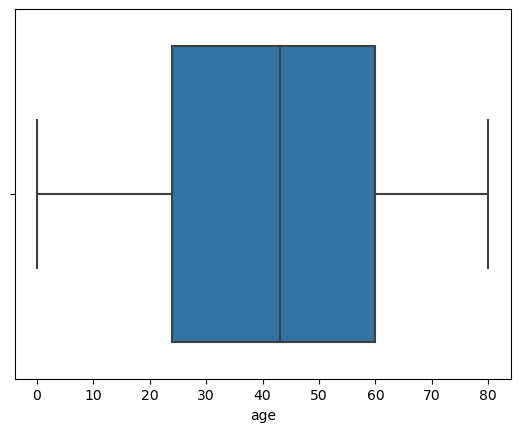

In [22]:
# Plotting boxplot for age

sns.boxplot(data = df, x = 'age')

<Axes: xlabel='HbA1c_level'>

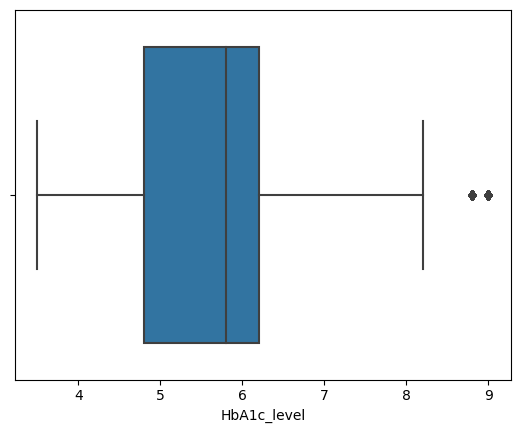

In [23]:
# Plotting boxplot for HbA1c_level

sns.boxplot(data = df, x = 'HbA1c_level')

# ML Algos

In [24]:
# value count of smoking history features

def naming(status):
    if status in ['never', 'No Info']:
        return "non-smoker"
    elif status == 'current':
        return "current"
    elif status in ['former', 'ever', 'not current']:
        return "past-smoker"
    
df['smoking_history'] = df['smoking_history'].apply(naming)
df['smoking_history'].value_counts()

smoking_history
non-smoker     70902
past-smoker    19794
current         9286
Name: count, dtype: int64

In [25]:
# label encoding

data = df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [27]:
# Displaying gender and smoking_history after label encoding

df.head(11)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,1,27.32,6.6,85,0
6,0,44.0,0,0,1,19.31,6.5,200,1
7,0,79.0,0,0,1,23.86,5.7,85,0
8,1,42.0,0,0,1,33.64,4.8,145,0
9,0,32.0,0,0,1,27.32,5.0,100,0


# Bivariate Analysis & Multivariate Analysis

<Axes: >

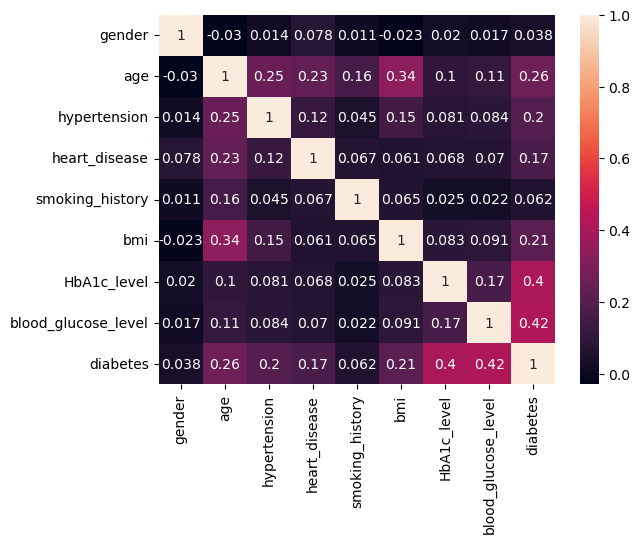

In [28]:
# heatmap of columns

sns.heatmap(data = df.corr(), annot = True)

<Axes: xlabel='gender', ylabel='diabetes'>

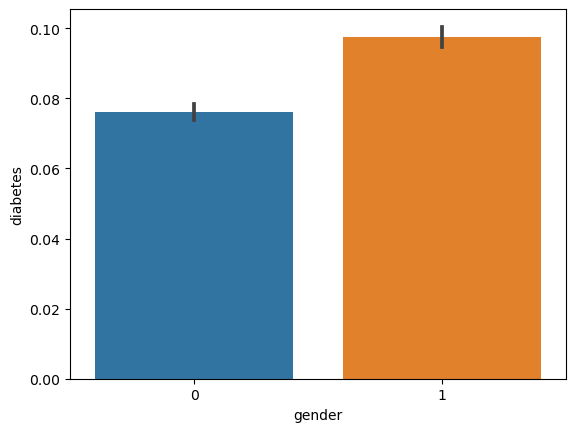

In [29]:
# again viewing value count in gender

sns.barplot(data = df, x = 'gender', y = 'diabetes')

<Axes: xlabel='gender', ylabel='blood_glucose_level'>

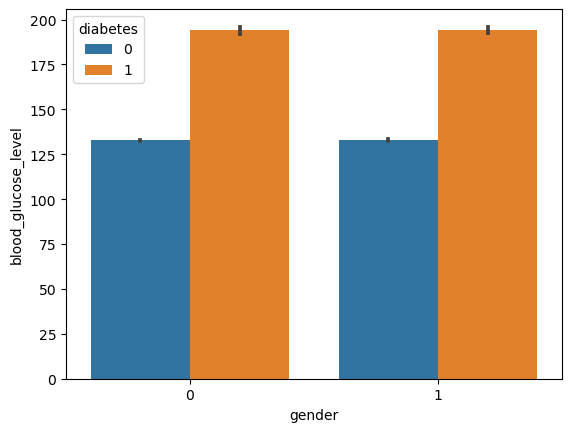

In [30]:
# count of male female having diabetes with blood glucose level

sns.barplot(data = df, x = 'gender', y = 'blood_glucose_level', hue = 'diabetes')

<Axes: xlabel='gender', ylabel='HbA1c_level'>

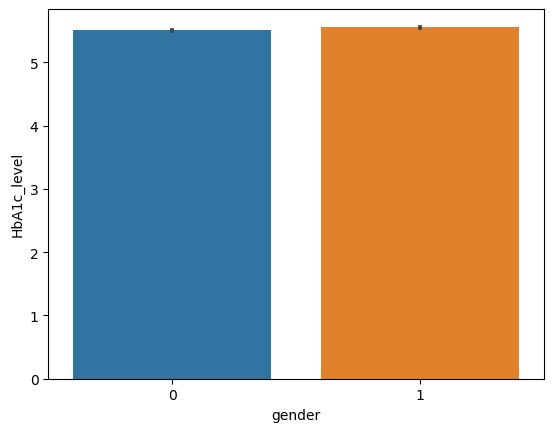

In [31]:
# Count of male female having HbA1c_level

sns.barplot(data = df, x = 'gender', y = 'HbA1c_level')

<Axes: xlabel='smoking_history', ylabel='bmi'>

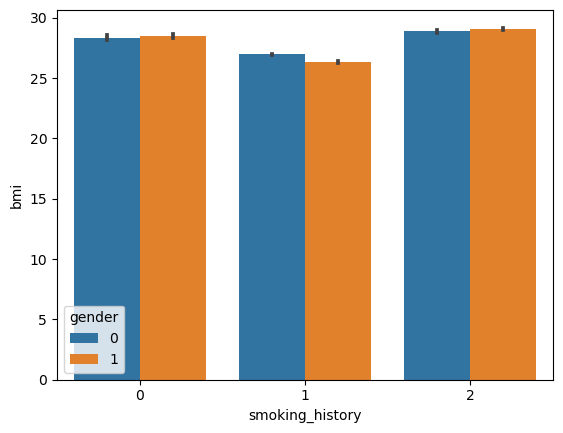

In [32]:
# smoking history of male and female with bmi

sns.barplot(data = df, x = 'smoking_history', y = 'bmi', hue = 'gender')

<Axes: xlabel='age', ylabel='HbA1c_level'>

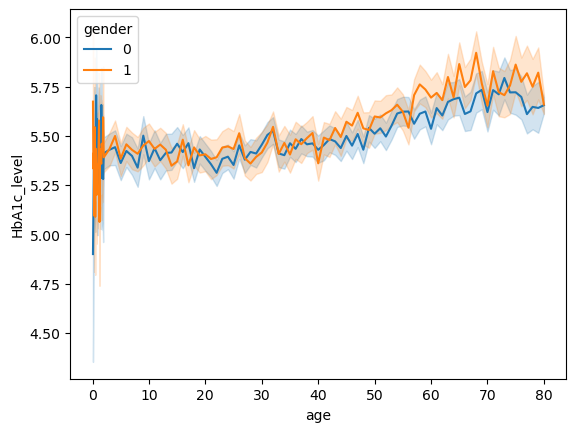

In [33]:
# linegraph displaying age of male and females having HbA1c_levels

sns.lineplot(data = df, x = 'age', y = 'HbA1c_level', hue = 'gender')

<Axes: xlabel='gender', ylabel='age'>

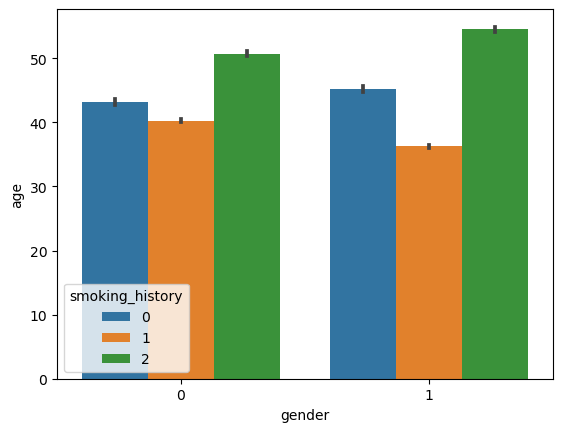

In [34]:
# Barplot of gender having smoking history by age

sns.barplot(data = df, x = 'gender', y = 'age', hue = 'smoking_history')

<Axes: xlabel='age', ylabel='smoking_history'>

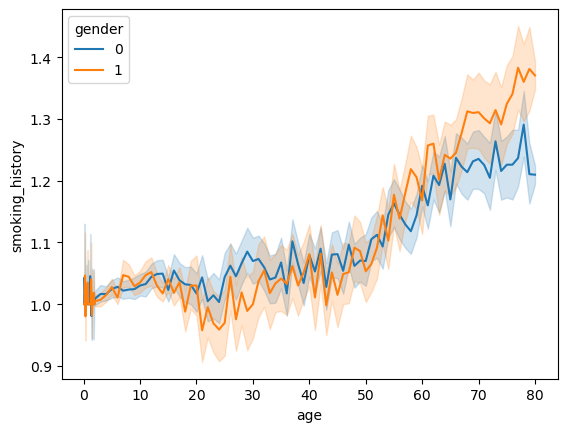

In [35]:
# Age of male and female with their smoking history

sns.lineplot(data = df, x = 'age', y = 'smoking_history', hue = 'gender')

<Axes: xlabel='hypertension', ylabel='blood_glucose_level'>

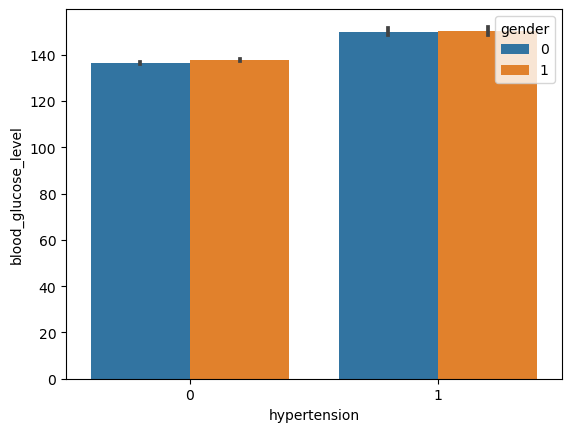

In [36]:
# Male and female suffering from hypertension and blood glucose level

sns.barplot(data = df, x = 'hypertension', y = 'blood_glucose_level', hue = 'gender')

<Axes: xlabel='blood_glucose_level', ylabel='heart_disease'>

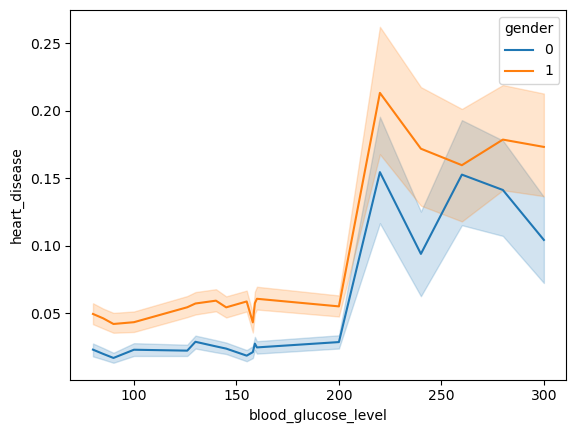

In [37]:
# male and female having blood glucose level suffering from heart disease

sns.lineplot(data = df, x = 'blood_glucose_level', y = 'heart_disease',hue =  'gender')

<Axes: xlabel='heart_disease', ylabel='bmi'>

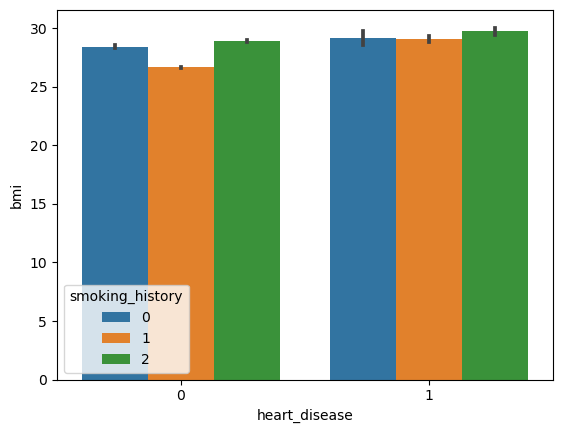

In [38]:
# Number of people with smoking history and heart disease and their bmi

sns.barplot(data = df, x = 'heart_disease', y = 'bmi', hue = 'smoking_history')

<Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>

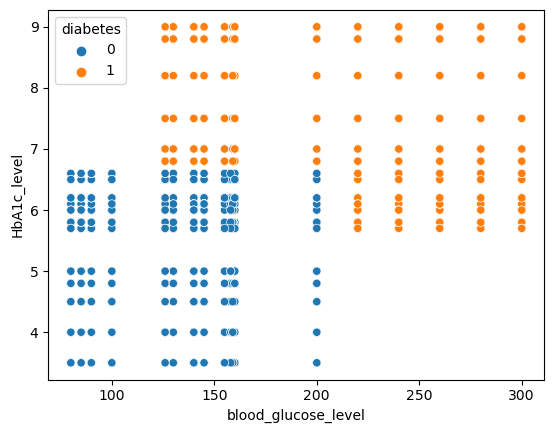

In [39]:
# people having diabetes and blood glucose level and their HbA1c_level

sns.scatterplot(data = df, x = 'blood_glucose_level', y = 'HbA1c_level', hue = 'diabetes')

In [40]:
# Splitting dataset for training and testing

X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [41]:
# Applying train test split method

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [42]:
# RandomForest Classifier

#{'max_depth': 20, 'max_leaf_nodes': 10, 'n_estimators': 100}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( max_depth= 20, max_leaf_nodes = 10, n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=10)

In [43]:
# Score of training dataset after applying algorithm

rf.score(X_train, y_train)

0.9718572232293555

In [44]:
# Score of testing dataset after applying algorithm

rf.score(X_test, y_test)

0.9718957843676551

In [45]:
# predicting using test dataset

y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [46]:
# importing accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# rf_classifier=RandomForestClassifier(max_depth=150,max_leaf_nodes=60,n_estimators=300)

# Calculate accuracy

print("Train accuracy : ",rf.score(X_train,y_train))
print("Test accuracy : ",rf.score(X_test,y_test))
print("Accuracy score of the model",accuracy_score(y_test,y_pred))

# Classification report
print("Classifiation Report")
print(classification_report(y_test,y_pred))

Train accuracy :  0.9718572232293555
Test accuracy :  0.9718957843676551
Accuracy score of the model 0.9718957843676551
Classifiation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18315
           1       1.00      0.67      0.80      1682

    accuracy                           0.97     19997
   macro avg       0.99      0.83      0.89     19997
weighted avg       0.97      0.97      0.97     19997



Text(0.5, 1.0, 'Confusion matrix: Random Forest')

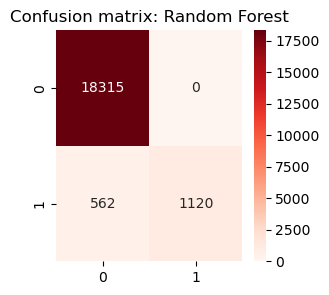

In [47]:
    # Creating confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix: Random Forest')

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, KFold

# Repeated K-fold CV

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=52)
# creating RepeatedStratifiedKFold 
cross_validation = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=200)

# Performing Cross-Validation
k_scores = cross_val_score(rf, X_val, y_val, scoring='accuracy', cv=cross_validation)

# Accuracy Score
print('Accuracy: %.3f (%.3f)' % (np.mean(k_scores), np.std(k_scores)))

Accuracy: 0.971 (0.007)


In [49]:
#Hyperparameter tuning
parameter={"n_estimators":[100, 150],"max_depth":[20, 40],"max_leaf_nodes":[10, 20]}

grid_search =GridSearchCV(rf,param_grid=parameter,cv=2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 20, 'max_leaf_nodes': 10, 'n_estimators': 100}

# Logistic Regression

In [50]:
# Applying logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

In [51]:
# splitting for training and testing

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=15)

In [52]:
# Apply logistic regression

logistic_model = LogisticRegression()

In [53]:
logistic_model.fit(X_train, y_train)

/Users/manassaxena/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# predict test data

y_pred = logistic_model.predict(X_test)

In [55]:
# checking accuracy score and confusion matrix

accuracy = accuracy_score(y_test,y_pred)*100

confusion_mat = confusion_matrix(y_test,y_pred)

In [56]:
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 95.87938190728609
Confusion Matrix
[[18099   121]
 [  703  1074]]


# KNN

In [57]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

Train accuracy :  0.970469463024317
Test accuracy :  0.9509426413962094
Accuracy score of the model 0.9509426413962094
Classifiation Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18220
           1       0.83      0.56      0.67      1777

    accuracy                           0.95     19997
   macro avg       0.89      0.78      0.82     19997
weighted avg       0.95      0.95      0.95     19997



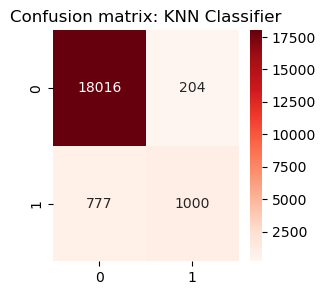

In [58]:
knn=KNeighborsClassifier(n_neighbors=3)

# train data
knn.fit(X_train,y_train)


# Make prediction on test data
y_pred = knn.predict(X_test)


# Calculate accuracy
print("Train accuracy : ",knn.score(X_train, y_train))
print("Test accuracy : ",knn.score(X_test, y_test))
print("Accuracy score of the model", accuracy_score(y_test, y_pred))

# Classification report
print("Classifiation Report")
print(classification_report(y_test, y_pred))

# Creating confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", fmt="g")
plt.title("Confusion matrix: KNN Classifier")
plt.show()